# Introduction
The movie industry has embraced data analysis and analytics in recent years to make more informed decisions, optimize marketing strategies, understand audience preferences, and improve the overall performance of films. Data analysis in the movie industry is a powerful tool that helps studios and production companies navigate the complexities of an ever-changing market and enhance the overall movie-going experience for audiences.




### Step 1 .Import the necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


### Step 2 Import the dataset 

In [2]:
df=pd.read_csv('movies.csv')

### Step 3 Clean up the dataset

In [33]:
#lets see if we have missinng data with a percentage
for col in df.columns:
    pct_missing =np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [34]:
#diferent way to see missing data 
pd.isnull(df).sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Step 4 see the dtype of the columns

In [35]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Step 5 order the data 

In [36]:
#we gonna sort the data by the revenue of the movie 
df.sort_values(by='gross',ascending=False,inplace=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


### Step 5 drop the duplicated rows 

In [37]:
#lest see if there is anny duplicated 
duplicated_rows = df.duplicated()
duplicated_rows #as we can see there is no duplicated rows 
df.drop_duplicates()
df.dropna() #and drop NAN if there is

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


### Step 5 See if we have correlation with the budget 

<Axes: xlabel='budget', ylabel='gross'>

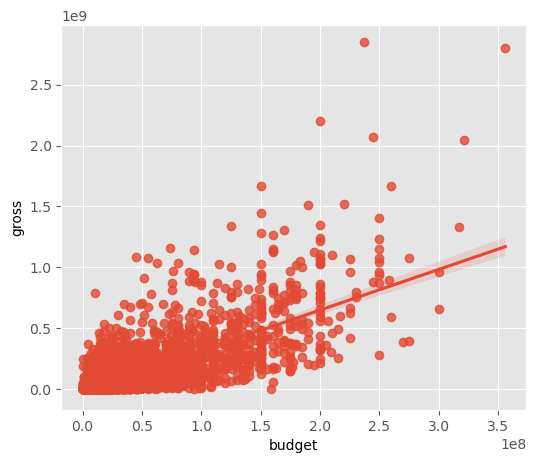

In [52]:
#build scatter plot with budget vs gross
sns.regplot(x="budget", y="gross", data=df) #regplot to se the correlation

In [43]:
#pearson correlation
df.corr()

C:\Users\zakaria\AppData\Local\Temp\ipykernel_8876\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


C:\Users\zakaria\AppData\Local\Temp\ipykernel_8876\1295386731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


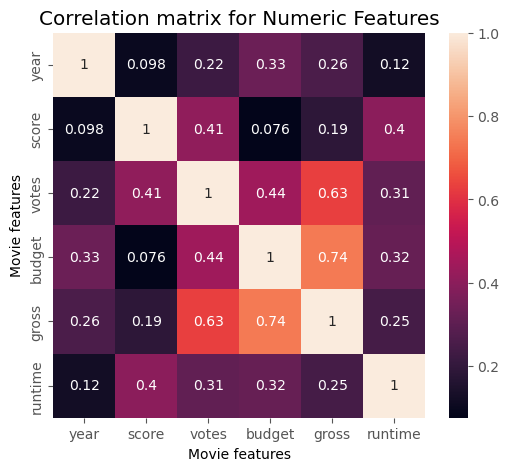

In [51]:
plt.figure(figsize=(6,5))
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

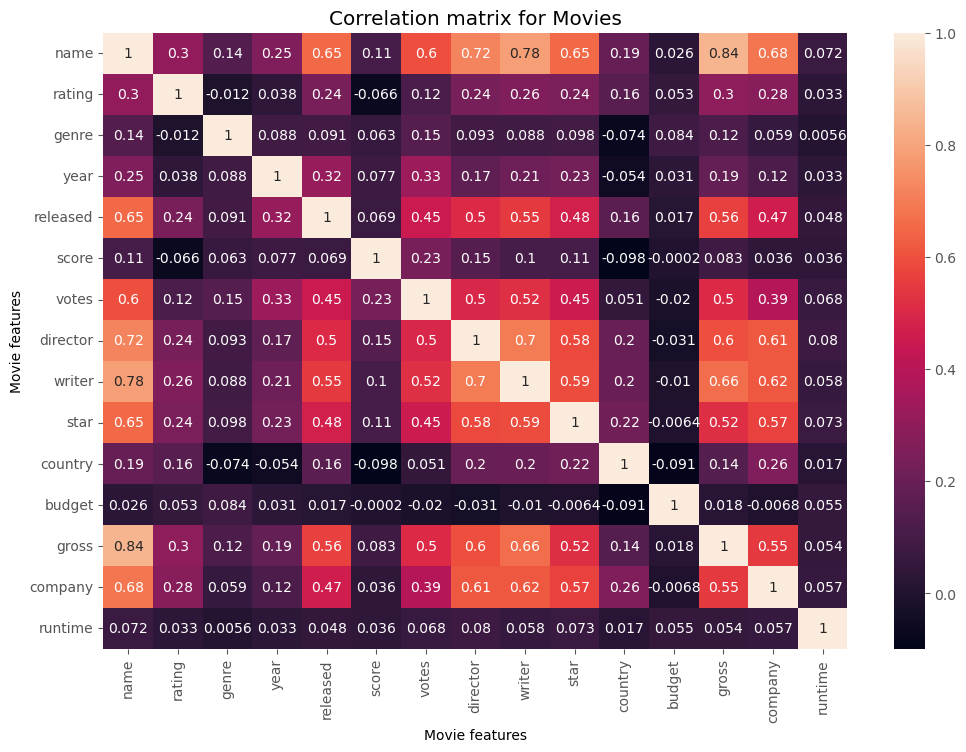

In [56]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson') # lets see if we have a coorelation with company

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

### Step 6.Arrange the correlation using unstack

In [57]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.303922
         genre       0.138277
         year        0.253700
         released    0.654899
                       ...   
runtime  country     0.017458
         budget      0.055318
         gross       0.054209
         company     0.056981
         runtime     1.000000
Length: 225, dtype: float64


In [58]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score    country   -0.098456
country  score     -0.098456
         budget    -0.091056
budget   country   -0.091056
genre    country   -0.073886
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [59]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released  director    0.502859
director  released    0.502859
votes     gross       0.504208
gross     votes       0.504208
          star        0.516135
star      gross       0.516135
writer    votes       0.521099
votes     writer      0.521099
writer    released    0.547903
released  writer      0.547903
company   gross       0.548719
gross     company     0.548719
released  gross       0.561106
gross     released    0.561106
company   star        0.569651
star      company     0.569651
director  star        0.580143
star      director    0.580143
          writer      0.589925
writer    star        0.589925
votes     name        0.595689
name      votes       0.595689
director  gross       0.596073
gross     director    0.596073
director  company     0.614240
company   director    0.614240
          writer      0.615928
writer    company     0.615928
name      star        0.652837
star      name        0.652837
released  name        0.654899
name      released    0.654899
gross   

## to concliud the company has no correlation